In [14]:
#### suponiendo sitribucion estacionaria

import numpy as np
from scipy.stats import beta
import pandas as pd


# Paso 0: parámetros
n_activos = 12  # Número de activos
periodos = 1825  # Este es T: Número de días (365 días hábiles en un año) 4 AÑOS
incremento = 1  # Incremento no utilizado, pero lo incluyo para referencia
ventana_adts = 1000  # Cada cuántos días cambia la media

# Generar fechas para todo un año con días hábiles


fechas = pd.date_range('1974-01-01', periods=periodos)  # Fechas de simulación

# Inicializar matrices para los retornos y para las medias verdaderas
data = np.zeros((periodos, n_activos))  # Matriz de retornos simulados
medias_reales = np.zeros((periodos, n_activos))  # Matriz para almacenar las medias verdaderas

# Función para asignar una media aleatoria inicial para cada activo
def media_aleatoria():
    return np.random.choice([1, 1.5, 2, 2.2, 2.6, 0.5, 3.4, 1.5, 2, 2.2, 2.5, 3])

# Generación de los datos
# Establecer una media fija para cada activo al principio
medias_fijas = np.array([media_aleatoria() for _ in range(n_activos)])

for t in range(periodos):
    # Usar la media fija para cada activo durante todo el período
    medias_actuales = medias_fijas #+ np.random.uniform(0, 10, n_activos)  # Ajustar con desplazamiento aleatorio

    # Generar los retornos con una distribución normal centrada en la media actual
    data[t, :] = np.random.normal(loc=medias_actuales, scale=1, size=n_activos)

    # Registrar las medias verdaderas para cada activo
    medias_reales[t, :] = medias_fijas  # Registrar la misma media fija

# Crear DataFrames de los retornos y las medias reales
df = pd.DataFrame(data, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])
df_medias = pd.DataFrame(medias_reales, index=fechas, columns=[f'Activo_{i+1}' for i in range(n_activos)])



In [15]:
df_medias

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,Activo_11,Activo_12
1974-01-01,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1974-01-02,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1974-01-03,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1974-01-04,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1974-01-05,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-26,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1978-12-27,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1978-12-28,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0
1978-12-29,2.5,2.0,2.6,3.4,2.0,2.0,3.4,1.0,3.0,2.5,3.4,3.0


In [16]:
df

,Activo_1,Activo_2,Activo_3,Activo_4,Activo_5,Activo_6,Activo_7,Activo_8,Activo_9,Activo_10,Activo_11,Activo_12
1974-01-01,3.022288,1.213522,5.128100,4.412591,1.096195,1.991092,2.317950,0.424994,4.187989,3.176598,3.706321,2.443759
1974-01-02,2.563953,-0.092974,4.719021,3.281258,1.336411,1.390308,4.120445,-0.641579,0.884498,1.807247,3.370621,1.156153
1974-01-03,1.833159,1.982275,1.357657,2.750382,1.910192,2.236130,1.715468,0.533086,3.463330,2.417091,2.018433,2.785167
1974-01-04,2.004727,1.379490,2.181850,1.931453,3.741044,3.065235,2.719605,0.318675,4.254292,1.074400,5.131985,2.852703
1974-01-05,4.552293,3.094938,3.585724,4.364329,1.166420,2.288269,1.584198,1.979116,2.734065,2.411570,2.290092,4.196547
...,...,...,...,...,...,...,...,...,...,...,...,...
1978-12-26,1.343780,2.485179,4.109119,4.438089,3.234951,3.564599,2.833463,1.929055,3.880738,2.961536,1.639722,2.997000
1978-12-27,2.526418,0.243774,1.865243,4.041188,1.249858,1.981906,4.300770,0.194025,3.151377,2.987015,3.423192,3.085264
1978-12-28,3.424461,1.159311,4.369296,4.317384,2.969835,1.625951,3.808587,1.085590,3.665205,1.004551,3.678632,4.330322
1978-12-29,3.990990,1.800064,1.378453,2.707846,2.096587,1.400534,2.394955,0.586350,2.803356,3.004350,1.797051,1.704932


In [18]:
df_portafolios.values

array([[0.77070287, 0.61439008, 0.65132503, ..., 0.59070059, 0.59009595,
        0.68874992],
       [0.74242816, 0.64253057, 0.65598423, ..., 0.75313165, 0.55680946,
        0.69937433],
       [0.65322735, 0.69731638, 0.66838401, ..., 0.45695514, 0.67634812,
        0.72324185],
       ...,
       [0.68151094, 0.54403418, 0.75591376, ..., 0.77854446, 0.60075213,
        0.69694054],
       [0.77758427, 0.57232096, 0.61791836, ..., 0.72483632, 0.54839262,
        0.37089867],
       [0.75779988, 0.63691216, 0.61372827, ..., 0.58084587, 0.62950828,
        0.81652593]])

In [19]:
df_ortogonales_verdad_l

,portafolio_ortogonal_verdad1,portafolio_ortogonal_verdad2,portafolio_ortogonal_verdad3,portafolio_ortogonal_verdad4,portafolio_ortogonal_verdad5,portafolio_ortogonal_verdad6
1974-01-01,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1974-01-02,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1974-01-03,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1974-01-04,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1974-01-05,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
...,...,...,...,...,...,...
1978-12-26,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1978-12-27,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1978-12-28,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486
1978-12-29,2.199477,1.502812,1.510099,1.515098,2.494979,2.486486


In [21]:
portafolios_dinamicos

[            portafolio_ortogonal_1  portafolio_ortogonal_2  \
 1974-01-01                0.587490               -1.099624   
 1974-01-02                0.558363                0.715661   
 1974-01-03                0.676042                0.513730   
 1974-01-04                0.725728                0.626544   
 1974-01-05                0.648738                0.216118   
 ...                            ...                     ...   
 1978-12-26                0.854625              101.325637   
 1978-12-27                0.715030               -0.449576   
 1978-12-28                0.601281                0.589659   
 1978-12-29                0.548881                0.313715   
 1978-12-30                0.629888                0.404427   
 
             portafolio_ortogonal_3  portafolio_ortogonal_4  \
 1974-01-01                0.586199                0.640088   
 1974-01-02                0.748474                0.719046   
 1974-01-03                0.480523                0.

In [ ]:
portafolios_dinamicos_verdad

In [ ]:


df_portafolios=df
## 
ventana = 1000  # Tamaño de la ventana móvil (ajustado para que funcione con los 20 días)
cov_matrices = []
for i in range(ventana, len(df_portafolios)):
    ventana_datos = df_portafolios.iloc[i-ventana:i]
    cov_matrices.append(ventana_datos.cov().values)


# Lista para almacenar los portafolios dinámicos
portafolios_dinamicos = []
portafolios_dinamicos_verdad = []

for t, cov in enumerate(cov_matrices):
    cov_matrix = cov

    # Paso 5: Descomponer la matriz de covarianzas (autovalores y autovectores)
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Paso 6: Ordenar los autovalores y autovectores en orden descendente
    idx = eigenvalues.argsort()[::-1]  # Índices ordenados
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    eigenvectors = eigenvectors.astype(float)

    eigenvectors_normalized = []
    # Paso 7: Normalizar los eigenvectores seleccionados
    for i in range(eigenvectors.shape[1]):
        col_sum = np.sum(np.abs(eigenvectors[:, i]))
        eigenvectors[:, i] = np.abs(eigenvectors[:, i] / col_sum)

    # Paso 7: Normalizar los eigenvectores seleccionados
    eigenvectors_normalized = eigenvectors

    # Paso 8: Crear portafolios ortogonales a partir de los eigenvectores normalizados
    df_ortogonales = pd.DataFrame(
        np.dot(df_portafolios.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )

    df_ortogonales_verdad = pd.DataFrame(
        np.dot(df_medias.values, eigenvectors_normalized),
        index=fechas,
        columns=[f'portafolio_ortogonal_verdad{i+1}' for i in range(eigenvectors_normalized.shape[1])]
    )

    # Paso 9: Determinar dinámicamente el número de eigenportafolios principales (l)
    mediana_eigenvalores = np.median(eigenvalues)  # Calcular la mediana de los eigenvalores
    l = sum(eigenvalues > mediana_eigenvalores)  # Contar cuántos eigenvalores superan la mediana

    # Paso 10: Seleccionar los primeros l portafolios ortogonales
    df_ortogonales_l = df_ortogonales.iloc[:, :l]
    df_ortogonales_verdad_l = df_ortogonales_verdad.iloc[:, :l]
    portafolios_dinamicos.append(df_ortogonales_l)
    portafolios_dinamicos_verdad.append(df_ortogonales_verdad_l)

    # Mostrar los pesos de los portafolios principales
    #print(f"Número de eigenportafolios seleccionados dinámicamente l={l} en t={t}")

# Mostrar los pesos de los portafolios principales (autovectores normalizados)
print("Pesos de los portafolios principales (autovectores normalizados):")
print(eigenvectors_normalized[:, :l])  # Pesos de los primeros 'l' portafolios ortogonales

# Crear una lista vacía para almacenar las filas
filas = []
filas_verdad=[]

# Supongamos que portafolios_dinamicos es una lista de DataFrames
for i in range(len(portafolios_dinamicos)):
    # Tomamos la fila correspondiente, incrementando el índice con el valor de 'i'
    fila = portafolios_dinamicos[i].iloc[ventana-1 + i]  # Ajustamos el índice de la fila
    filas.append(fila)
    fila_verdad=  portafolios_dinamicos_verdad[i].iloc[ventana-1 + i]
    filas_verdad.append(fila_verdad)


# Convertir la lista de filas en un DataFrame
resultado_df = pd.DataFrame(filas)
resultado_df_verdad=pd.DataFrame(filas_verdad)
    
    

# Definimos la función de Thompson Sampling Adaptado con Descuento
def adaptive_discounted_thompson_sampling(returns, gamma, w):
    """
    Adaptive Discounted Thompson Sampling (Algorithm 1).

    Parameters:
        returns (pd.DataFrame): DataFrame donde las filas son días y las columnas son portafolios,
                                y los valores son los retornos diarios.
        gamma (float): Factor de descuento (0 < gamma <= 1).
        w (int): Tamaño de la ventana deslizante (1 <= w <= T). 

    Returns:
        actions (list): Índices de los portafolios seleccionados cada día.
        observed_rewards (list): Retornos observados para los portafolios seleccionados.
    """
    T, K = returns.shape  # T: número de días, K: número de portafolios
    returns_binario = returns.apply(lambda row: row == row.max(), axis=1).astype(int)
    
    # Inicializar parámetros alpha y beta
    alpha = np.ones(K)  # α_k inicializado en 1
    beta_params = np.ones(K)  # β_k inicializado en 1

    actions = []  # Almacenar los portafolios elegidos
    observed_rewards = []  # Almacenar los retornos observados
    eventos = []  # Almacenar los eventos (1 si la acción fue correcta)

    for t in range(T):
        # Step 2: Calcular θ_k(t) y θ̌_k(t) para cada portafolio
        theta = []
        theta_tilde = []
        for k in range(K):
            # θ_k(t) ~ Beta(α_k + 1, β_k + 1)
            theta_k = beta.rvs(alpha[k] + 1, beta_params[k] + 1)
            theta.append(theta_k)
            
            # θ̌_k(t) ~ Beta(α_k^w, β_k^w), utilizando las últimas w recompensas
            if t < w:
                ventana_reward_t = returns_binario.iloc[0:t, k]  # Retorna lo más que pueda
            else:
                ventana_reward_t = returns_binario.iloc[t-w:t, k]  # Si t es mayor que w, retorna los datos t-w
        
            alpha_w = np.count_nonzero(ventana_reward_t.values)  # Suponiendo recompensas positivas son éxitos
            beta_w = len(ventana_reward_t.values) - alpha_w
            theta_tilde_k = beta.rvs(alpha_w + 1, beta_w + 1)
            theta_tilde.append(theta_tilde_k)
        
        # Step 6: Elegir el portafolio I(t) = argmax_k f(θ_k(t), θ̌_k(t))
        f_values = [(theta[k] + theta_tilde[k]) / 2 for k in range(K)]
        I_t = np.argmax(f_values)  # Índice del portafolio seleccionado con la ponderación
        actions.append(I_t)

        # Step 7: Observar el retorno r_t del portafolio seleccionado
        reward_t = returns.iloc[t, I_t]
        observed_rewards.append(reward_t)

        # Step 8: Calcular X_t (1 si retorno es positivo, 0 en caso contrario)
        X_t = 1 if reward_t == returns.iloc[t, :].max() else 0
        eventos.append(X_t)

        # Step 9: Actualizar Beta(α_k, β_k) para todos los portafolios
        for k in range(K):  # Actualizo tanto el que disparó como el máximo
            if k == I_t:
                alpha[k] = gamma * alpha[k] + 1
                beta_params[k] = gamma * beta_params[k] 
            else:
                alpha[k] = gamma * alpha[k] 
                beta_params[k] = gamma * beta_params[k] + 1
        
    return actions, observed_rewards, eventos


# Definir las simulaciones
n_simulaciones = 10
gamma = 0.2  # Facor de descuento
w = 1000  # Tamaño de la ventana deslizante
regrets_totales = []  # Lista para almacenar los regrets de todas las simulaciones
returns=resultado_df
# Ejecutar 30 simulaciones
for sim in range(n_simulaciones):
    print(f"Simulación {sim + 1}/{n_simulaciones}")   
    
    # Ejecutar el algoritmo
    actions, observed_rewards, eventos = adaptive_discounted_thompson_sampling(returns, gamma, w)
    
    regrets = []

    # Suponiendo que tienes un DataFrame como 'resultado_df_verdad' y una lista 'actions'
    for x in range(len(resultado_df_verdad)):
        action_tomada = actions[x]
        
        # Obtener la recompensa obtenida de la columna correspondiente a la acción tomada
        reward_obtenido = resultado_df_verdad.loc[resultado_df_verdad.index[x], resultado_df_verdad.columns[action_tomada]]
        
        # Seleccionar todas las columnas que contienen 'portafolio_ortogonal_verdad' en su nombre
        columnas_interes = [col for col in resultado_df_verdad.columns if 'portafolio_ortogonal_verdad' in col]
        
        # Calcular el máximo entre las columnas seleccionadas para esa fila
        maximo_reward = resultado_df_verdad.loc[resultado_df_verdad.index[x], columnas_interes].max()
        
        # Calcular el regret (diferencia entre el máximo reward y el reward obtenido)
        regret = maximo_reward - reward_obtenido
        regrets.append(regret)

    # Almacenar los regrets de la simulación actual
    regrets_totales.append(regrets)

# Convertir la lista de regrets en un DataFrame para análisis
regrets_df = pd.DataFrame(regrets_totales)

# Mostrar los regrets promedio de las 30 simulaciones
regrets_promedio = regrets_df.mean(axis=0)
print("\nRegrets promedio de las 30 simulaciones:")
print(regrets_promedio)


In [22]:
resultado_df 

,portafolio_ortogonal_1,portafolio_ortogonal_2,portafolio_ortogonal_3,portafolio_ortogonal_4,portafolio_ortogonal_5,portafolio_ortogonal_6
1976-09-26,0.285327,0.281869,0.754150,0.729051,0.569598,0.387562
1976-09-27,0.675550,0.601343,0.671926,0.591916,0.739862,0.707611
1976-09-28,0.269552,0.694593,0.401305,0.369474,0.692263,0.665630
1976-09-29,0.616288,0.728674,0.704444,0.626315,0.763153,0.667509
1976-09-30,0.508637,0.605863,0.723918,0.482265,0.670448,0.699714
...,...,...,...,...,...,...
1978-12-25,0.619387,0.377136,0.648461,0.769354,0.700830,0.680123
1978-12-26,0.796247,0.818667,103.140423,1.139534,0.861015,0.854809
1978-12-27,0.749039,0.715067,-0.470956,0.711412,0.739182,0.592016
1978-12-28,0.705937,0.593611,0.588443,0.220258,0.775444,0.794076


In [ ]:
1825 
1000



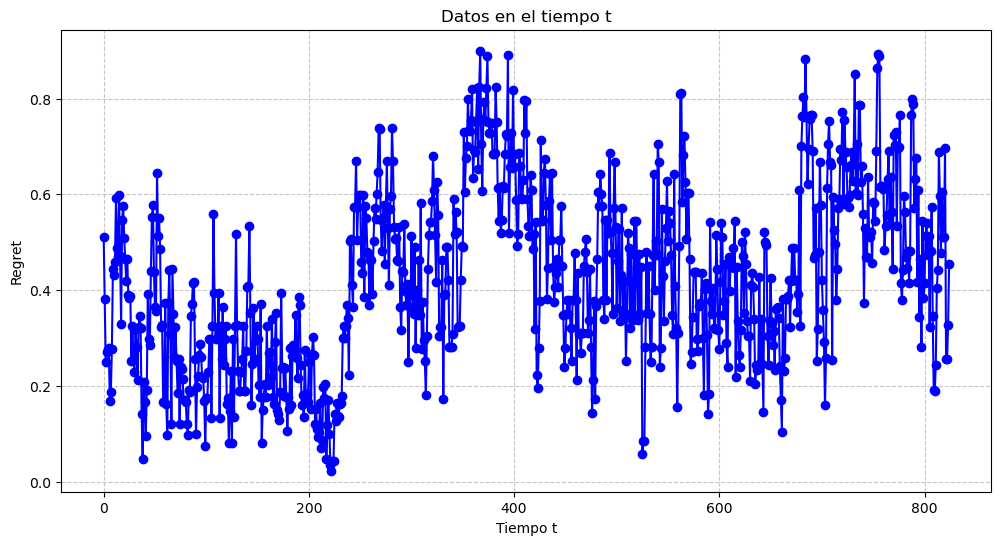

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedio)),regrets_promedio , marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


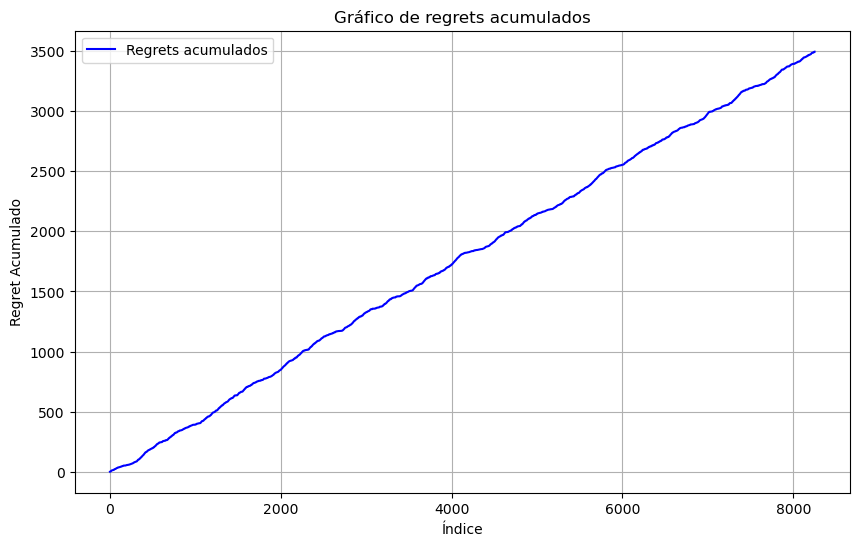

In [11]:
# Calcular el acumulado
regrets_acumulado = np.cumsum(regrets_totales)

# Graficar el acumulado
plt.figure(figsize=(10, 6))
plt.plot(regrets_acumulado, label="Regrets acumulados", color='b')
plt.title("Gráfico de regrets acumulados")
plt.xlabel("Índice")
plt.ylabel("Regret Acumulado")
plt.grid(True)
plt.legend()
plt.show()

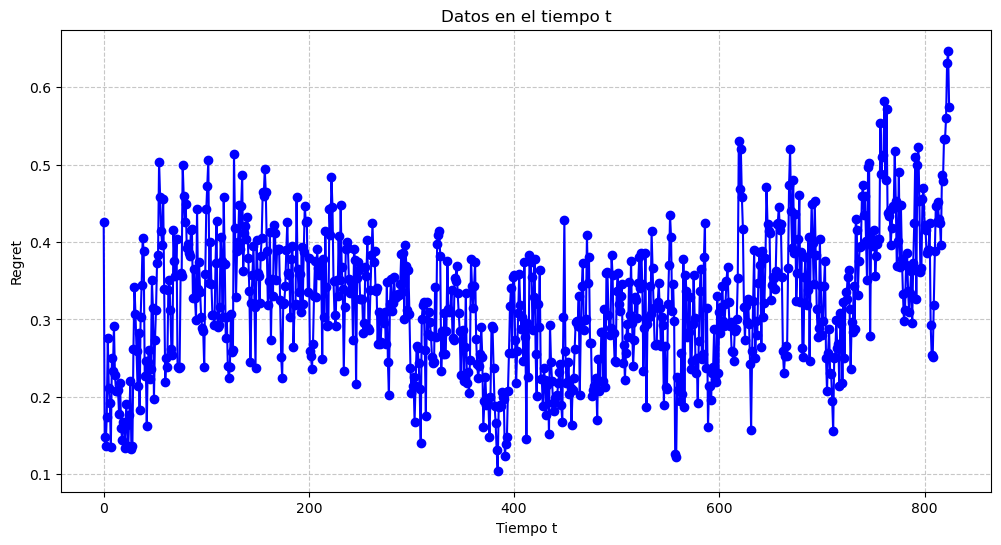

In [7]:
import matplotlib.pyplot as plt
regrets_promedios_sim = [np.mean(regrets_promedio[i::ventana-1]) for i in range(ventana-1)]
plt.figure(figsize=(12, 6))
plt.plot(range(len(regrets_promedios_sim)), regrets_promedios_sim, marker='o', linestyle='-', color='b')
plt.title("Datos en el tiempo t")
plt.xlabel("Tiempo t")
plt.ylabel("Regret")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()